**Business Analytics and Data Visualization**

Prof Jose Mendoza

Chapter 8 - Exercise 3

Appendix Regression Variable Selection Procedures with R

In this appendix, we describe how R can be used for variable selection in constructing multiple regression models including stepwise regression, forward selection, backward selection, and a best subset procedure. We consider a problem faced by a company that sells products in several sales territories, each of which is assigned to a single sales representative. A regression analysis was conducted to determine whether a variety of predictor (independent) variables could explain sales in each territory. A random sample of 25 sales territories resulted in the data in the file cravens_r.csv, and also shown in Table R1. The variable definitions for these data are shown in Table R2.

List of variables in the Craven data

*   Sales: Total sales credited to the sales representative
*   Time: Length of time employed in months
*   Poten: Market potential; total industry sales in units for the sales territory
*   AdvExp: Advertising expenditure in the sales territory
*   Share: Market share; weighted average for the past four years
*   Change: Change in the market share over the previous four years
*   Accounts: Number of accounts assigned to the sales representative
*   Work: Workload; a weighted index based on annual purchases and concentrations of accounts
*   Rating: Sales representative overall rating on eight performance dimensions; an aggregate rating on a 1-7 scale

> Note: This notebook assumes that the file cravens_r.csv is located in Google Drive, in a folder named 'Data'. *



In [ ]:
import pandas as pd

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read data file from the Data folder

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Data/butlerwithdeliveries_r.csv')
df.head()

Mounted at /content/drive


,Assignment,Miles,Deliveries,Time
0,1,100.0,4.0,9.3
1,2,50.0,3.0,4.8
2,3,100.0,4.0,8.9
3,4,100.0,2.0,6.5
4,5,50.0,2.0,4.2


In [ ]:
# Display a summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Assignment  300 non-null    int64  
 1   Miles       300 non-null    float64
 2   Deliveries  300 non-null    float64
 3   Time        300 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.5 KB


In [ ]:
# Perform a multiple linear regression with Time as the Y variable and Miles and Deliveries as X variables

import statsmodels.formula.api as sm

# Define the regression model
model = sm.ols('Time ~ Miles + Deliveries', data=df)

# Fit the model
result = model.fit()

# Print the regression summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     664.5
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          2.24e-110
Time:                        21:24:12   Log-Likelihood:                -368.26
No. Observations:                 300   AIC:                             742.5
Df Residuals:                     297   BIC:                             753.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1273      0.205      0.621      0.5

In [ ]:
# Create a vector of predicted values

# Get the predicted values
predicted_values = result.predict()

# Print the predicted values
print(predicted_values)


[ 9.60550446  5.55641908  9.60550446  8.2255079   4.8664208   6.88187306
  7.23596263  7.25414349  8.24368876  7.55369048  6.93641564  7.29050521
  9.28777661  5.87414693  6.9545965   5.55641908  8.61595919  7.92596091
  6.56414521  8.24368876  7.19960091 10.64959231  4.17642252  7.57187134
  7.55369048  7.57187134  7.23596263  7.88959919  6.8636922   8.91550618
  4.84823994  8.93368704  8.28005048 10.29550274  5.57459994  6.88187306
  8.93368704  8.9518679   7.88959919  8.61595919  4.88460166  5.22051037
  9.30595747  9.26959575  5.20232951  7.23596263  5.20232951 10.98550102
  6.24641736  3.5046051   8.93368704  6.19187478  7.57187134  9.62368532
  6.91823478  4.19460338  7.5900522   8.57959747  6.26459822  3.84051381
  6.60050693  7.94414177  7.21778177  7.21778177  7.23596263  5.91050865
  3.5046051   6.8636922   8.2255079   5.85596607  3.84051381  6.52778349
  5.53823822  6.21005564  8.59777833  8.28005048  9.97777489  9.28777661
  6.26459822  9.95959403  6.60050693  9.97777489  4

In [ ]:
# Create a vector of residual values

# Get the residuals
residuals = result.resid

# Print the residuals
print(residuals)


0     -0.305504
1     -0.756419
2     -0.705504
3     -1.725508
4     -0.666421
         ...   
295    0.953583
296   -0.676423
297    0.782218
298   -0.425508
299    1.365860
Length: 300, dtype: float64


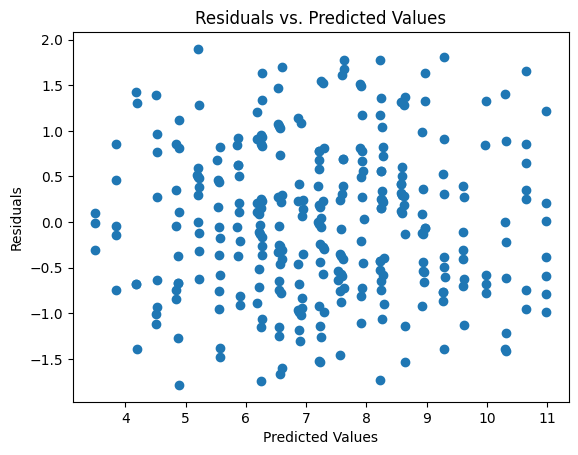

In [ ]:
# Plot residuals against predicted values

import matplotlib.pyplot as plt

# Plot residuals against predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


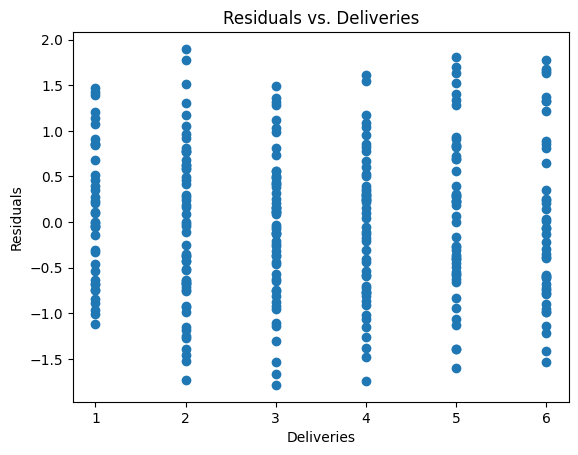

In [ ]:
# Plot residuals vs. Deliveries

# Plot residuals against Deliveries
plt.scatter(df['Deliveries'], residuals)
plt.xlabel('Deliveries')
plt.ylabel('Residuals')
plt.title('Residuals vs. Deliveries')
plt.show()


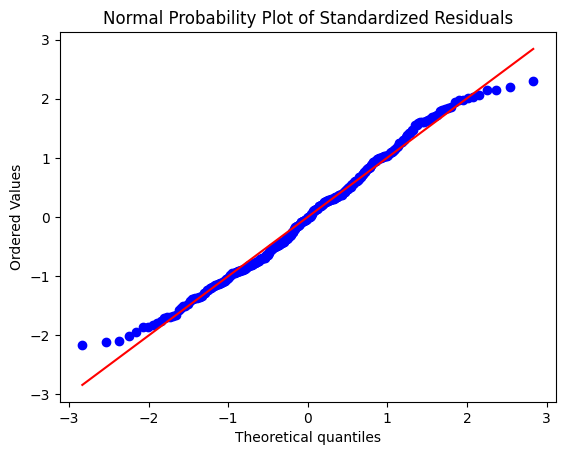

In [ ]:
# Produce a normal probability plot of standardized residuals

import scipy.stats as stats

# Calculate standardized residuals
standardized_residuals = result.get_influence().resid_studentized_internal

# Create a normal probability plot
stats.probplot(standardized_residuals, plot=plt)
plt.title('Normal Probability Plot of Standardized Residuals')
plt.show()


In [ ]:
# Create a list of standardize residuals

# Calculate standardized residuals
standardized_residuals = result.get_influence().resid_studentized_internal

#create a list of standardize residuals
standardized_residuals_list = standardized_residuals.tolist()
print(standardized_residuals_list)


[-0.37014999358390965, -0.9147444967321064, -0.8547910218015359, -2.0935753724742163, -0.8068782838106766, -0.8244396888781917, 0.19802026402627806, -1.5140833026212261, -0.7782634936459228, -1.7599171485822107, 0.077002703195162, -0.35311679394654616, 0.3776821111483402, 0.7564826202342145, 0.2986803206366006, 0.5364264535310976, 1.5520385332554418, 0.8136810665430041, -2.0089986308705727, -0.8991702949790276, 0.000484899733760911, -0.9105429163880393, 1.7279091168861165, -0.08678704195512689, 0.2981957639082902, -0.4490470438580883, -0.2848459668574404, 0.9820808705894194, -0.5628310179170406, 1.1928907682447623, -0.9069954710213256, 0.44288146039011744, 0.9910274133938317, -1.6928545109791353, -0.21164416846832393, -1.1871639560426086, -0.16163095471513825, -0.6672361485586349, 1.8303729788794327, 0.22245276229047117, 0.1398677916989301, 1.548873712967156, -0.7343056553964925, -1.0523657344028616, 2.2958309697471555, -1.3712949863458064, -0.0028182776905443805, -1.198491913421284, -

In [ ]:
# Calculate the hat values

# Calculate hat values
influence = result.get_influence()
hat_values = influence.hat_matrix_diag

# Print hat values
print(hat_values)


[0.01108776 0.00733328 0.01108776 0.01386851 0.00971738 0.00695848
 0.00380482 0.00396857 0.00693732 0.00953856 0.01015597 0.01746228
 0.00789839 0.00636933 0.01999925 0.00733328 0.00635609 0.0038153
 0.0039038  0.00693732 0.01664348 0.01615307 0.01463178 0.00441152
 0.00953856 0.00441152 0.00380482 0.0114848  0.0146701  0.01121299
 0.01201657 0.00686638 0.00624113 0.01349284 0.0120074  0.00695848
 0.00686638 0.00690851 0.0114848  0.00635609 0.01180692 0.00935136
 0.01142717 0.00875834 0.0081639  0.00380482 0.0081639  0.01842821
 0.00747947 0.01899686 0.00686638 0.01203573 0.00441152 0.00932574
 0.00470141 0.01413674 0.00367321 0.00885642 0.01473818 0.01659559
 0.01222834 0.00656364 0.00802979 0.00802979 0.00380482 0.0095247
 0.01899686 0.0146701  0.01386851 0.01137474 0.01659559 0.01313418
 0.00704788 0.00612825 0.00541189 0.00624113 0.01291519 0.00789839
 0.01473818 0.01119056 0.01222834 0.01291519 0.01170833 0.01664348
 0.00656364 0.00545569 0.01999925 0.00575265 0.01170833 0.003903

In [ ]:
# Print hat values greater than 0.03
for i, hat_value in enumerate(hat_values):
  if hat_value > 0.03:
    print(f"Observation {i+1}: {hat_value}")


In [ ]:
# Calculate the Cook's D Statistics

# Calculate Cook's D statistics
cooks_d = influence.cooks_distance[0]

# Print Cook's D statistics
print(cooks_d)


[5.12059432e-04 2.06050150e-03 2.73076785e-03 2.05471182e-02
 2.12953523e-03 1.58760773e-03 4.99214530e-05 3.04466648e-03
 1.41041616e-03 9.94279607e-03 2.02789378e-05 7.38698289e-04
 3.78541985e-04 1.22277260e-03 6.06847216e-04 7.08587845e-04
 5.13621008e-03 8.45232453e-04 5.27259951e-03 1.88268585e-03
 1.32652640e-09 4.53740148e-03 1.47781220e-02 1.11249188e-05
 2.85448014e-04 2.97831591e-04 1.03297092e-04 3.73519658e-03
 1.57212201e-03 5.37896388e-03 3.33518475e-03 4.52037039e-04
 2.05604423e-03 1.30653498e-02 1.81462346e-04 3.29190146e-03
 6.02071538e-05 1.03236381e-03 1.29747247e-02 1.05514801e-04
 7.79128121e-05 7.54859418e-03 2.07760299e-03 3.26177769e-03
 1.44615986e-02 2.39403074e-03 2.17923492e-08 8.98897312e-03
 4.82874550e-03 8.69256850e-05 9.59495140e-04 2.58461739e-04
 1.63715630e-03 5.80587771e-03 2.38107949e-03 1.36890749e-02
 1.72018653e-04 4.47851333e-04 5.14364670e-04 4.55356465e-03
 5.47671569e-04 6.34841011e-04 1.24857220e-06 2.41612525e-03
 3.52614498e-04 3.086286

In [ ]:
# Print Cook's D values greater than 1
for i, cook_d in enumerate(cooks_d):
  if cook_d > 1:
    print(f"Observation {i+1}: {cook_d}")


In [ ]:
# Create a new data frame to predict the the time it takes for Miles = 85 and Deliveries = 3

# Create a new DataFrame for prediction
new_data = pd.DataFrame({'Miles': [85], 'Deliveries': [3]})

# Predict sales for the new data
predicted_sales = result.predict(new_data)

# Calculate the 95% confidence interval for the prediction
prediction_interval = result.get_prediction(new_data).summary_frame(alpha=0.05)

# Print the predicted sales
print(predicted_sales, prediction_interval)


0    7.90778
dtype: float64       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  7.90778  0.061304       7.787136       8.028424      6.269969      9.545591
